In [ ]:
# In this lab, we will illustrate the use of multiple linear regression for calibrating robot control. 
# In addition to reviewing the concepts in the multiple linear regression demo, you will see how to use multiple linear regression
#for time series data -- an important concept in dynamical systems such as robotics.

# The robot data for the lab is taken generously from the TU Dortmund's Multiple Link Robot Arms Project. 
#As part of the project, they have created an excellent public dataset: 
#MERIt -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics. 
#The data is from a three link robot

# We will focus on predicting the current draw into one of the joints as a function of the robot motion. 
#Such models are essential in predicting the overall robot power consumption.
# Several other models could also be used.

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

In [10]:
df =  pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/12713f7238a852fb895c4778e71bc22671ec3a0a/unit03_mult_lin_reg/exp1.csv',
                 names =  names, index_col = False, )

In [11]:
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


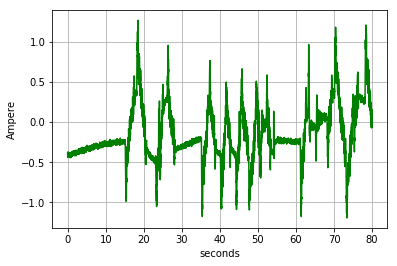

In [13]:
y = np.array(df['I2'])
t = np.array(df['t'])
plt.plot(t,y,'g')
plt.xlabel('seconds')
plt.ylabel('Ampere')
plt.grid(True)

In [14]:
xtrain = np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2' ]])
ytrain = np.array(df['I2'])

In [16]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

C:\Users\Ishita\Anaconda3\lib\site-packages\matplotlib\legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000216D3486400>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Ishita\Anaconda3\lib\site-packages\matplotlib\legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000216D34F7080>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


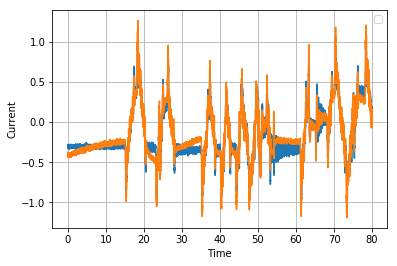

In [21]:
ytrain_predict = regression.predict(xtrain)
predicted = plt.plot(t, ytrain_predict, label = 'Predicted')
actual = plt.plot(t, y, label = 'Actual')
plt.xlabel('Time')
plt.ylabel('Current')
plt.grid(True)
plt.legend([predicted, actual], ['Predicted', 'Actual'])

In [23]:
RSS_train = np.mean((ytrain_predict-ytrain)**2)/(np.std(ytrain)**2)
print("RSS: ", RSS_train)

RSS:  0.09583263861233197


C:\Users\Ishita\Anaconda3\lib\site-packages\matplotlib\legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000216D3486400>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\Ishita\Anaconda3\lib\site-packages\matplotlib\legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x00000216D34F7080>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


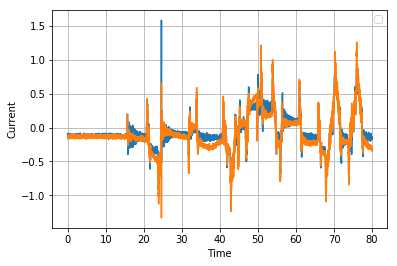

In [25]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/exp2.csv', index_col=False, names=names)
Ytest = np.array(df_2['I2'])
Xtest = np.array(df_2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
Ttest = np.array(df_2['t'])
ytest_pred = regression.predict(Xtest)
test_predicted, = plt.plot(Ttest,ytest_pred,label='predicted')
test_actual, = plt.plot(Ttest,Ytest, label='actual')
plt.xlabel('Time')
plt.ylabel('Current')
plt.grid(True)
plt.legend([predicted, actual], ['predicted', 'actual'])

In [26]:
# TODO
RSS_test = np.mean((ytest_pred-Ytest)**2)/(np.std(Ytest)**2)
print("RSS_Train: ", RSS_train)
print("RSS_Test: ", RSS_test) 

RSS_Train:  0.09583263861233197
RSS_Test:  0.12678048804762368
